# Lab 9

## 23rd March 2021

In [2]:
#installing important libraries

#visualizatiom
library(dplyr)
library(ggplot2)

#data wrangling
library(repr)
library(reshape2)

#feature selection
library(Boruta)

In [3]:
#loading data
df <- read.csv('energydata.csv')

In [4]:
#attributes check
str(df)

'data.frame':	19735 obs. of  29 variables:
 $ date       : Factor w/ 19735 levels "2016-01-11 17:00:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Appliances : int  60 60 50 50 60 50 60 60 60 70 ...
 $ lights     : int  30 30 30 40 40 40 50 50 40 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1       : num  47.6 46.7 46.3 46.1 46.3 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.6 44.6 44.5 ...
 $ T3         : num  19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3       : num  44.7 44.8 44.9 45 45 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.9 45.7 45.5 ...
 $ T5         : num  17.2 17.2 17.2 17.2 17.2 ...
 $ RH_5       : num  55.2 55.2 55.1 55.1 55.1 ...
 $ T6         : num  7.03 6.83 6.56 6.43 6.37 ...
 $ RH_6       : num  84.3 84.1 83.2 83.4 84.9 ...
 $ T7         : num  17.2 17.2 17.2 17.1 17.2 ...
 $ RH_7       : num  41.6 41.6 41.4 41.3 41.2 ...
 $ T8         : num  18.2 18.2 18.2 18.1 18.1 18.1 18.1 18.1 18.1 1

All the features except date in numeric or integer, which is great

In [5]:
#sneak in
head(df)

date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
2016-01-11 17:00:00,60,30,19.89,47.59667,19.2,44.79000,19.79,44.73000,19.00000,...,17.03333,45.53,6.600000,733.5,92,7.000000,63.00000,5.3,13.27543,13.27543
2016-01-11 17:10:00,60,30,19.89,46.69333,19.2,44.72250,19.79,44.79000,19.00000,...,17.06667,45.56,6.483333,733.6,92,6.666667,59.16667,5.2,18.60619,18.60619
2016-01-11 17:20:00,50,30,19.89,46.30000,19.2,44.62667,19.79,44.93333,18.92667,...,17.00000,45.50,6.366667,733.7,92,6.333333,55.33333,5.1,28.64267,28.64267
2016-01-11 17:30:00,50,40,19.89,46.06667,19.2,44.59000,19.79,45.00000,18.89000,...,17.00000,45.40,6.250000,733.8,92,6.000000,51.50000,5.0,45.41039,45.41039
2016-01-11 17:40:00,60,40,19.89,46.33333,19.2,44.53000,19.79,45.00000,18.89000,...,17.00000,45.40,6.133333,733.9,92,5.666667,47.66667,4.9,10.08410,10.08410
2016-01-11 17:50:00,50,40,19.89,46.02667,19.2,44.50000,19.79,44.93333,18.89000,...,17.00000,45.29,6.016667,734.0,92,5.333333,43.83333,4.8,44.91948,44.91948


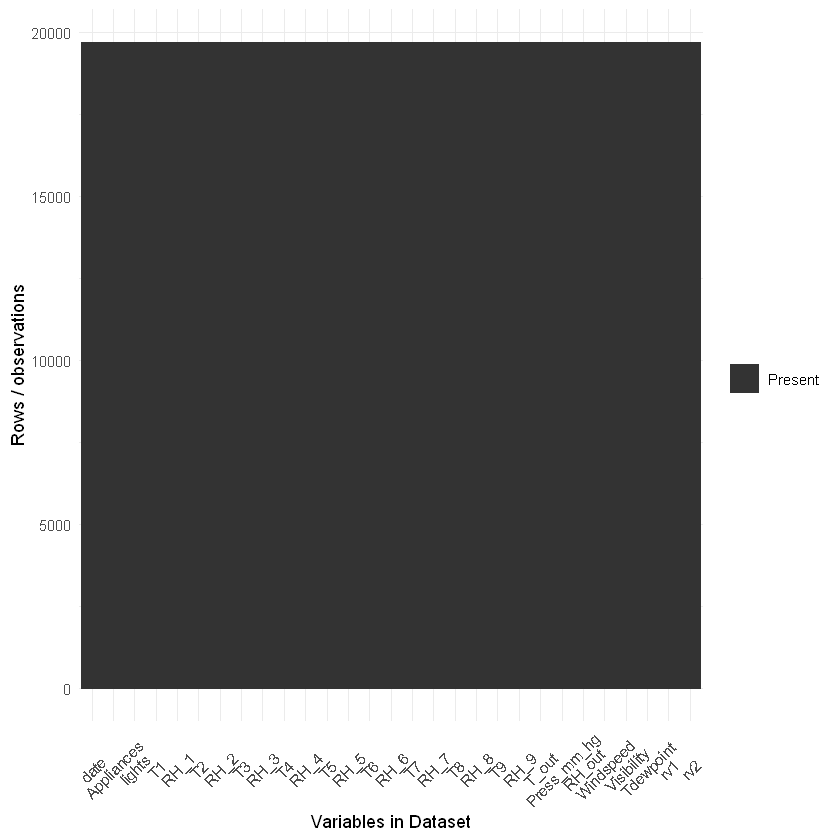

In [6]:
#visualizing mising data
ggplot_missing <- function(x){

  x %>% 
    is.na %>%
    melt %>%
    ggplot(data = .,
           aes(x = Var2,
               y = Var1)) +
    geom_raster(aes(fill = value)) +
    scale_fill_grey(name = "",
                    labels = c("Present","Missing")) +
    theme_minimal() + 
    theme(axis.text.x  = element_text(angle=45, vjust=0.5)) + 
    labs(x = "Variables in Dataset",
         y = "Rows / observations")
}
ggplot_missing(df)

We can see that there is no missing data, which is amazing

In [7]:
#statistical summary
summary(df)

                  date         Appliances          lights             T1       
 2016-01-11 17:00:00:    1   Min.   :  10.00   Min.   : 0.000   Min.   :16.79  
 2016-01-11 17:10:00:    1   1st Qu.:  50.00   1st Qu.: 0.000   1st Qu.:20.76  
 2016-01-11 17:20:00:    1   Median :  60.00   Median : 0.000   Median :21.60  
 2016-01-11 17:30:00:    1   Mean   :  97.69   Mean   : 3.802   Mean   :21.69  
 2016-01-11 17:40:00:    1   3rd Qu.: 100.00   3rd Qu.: 0.000   3rd Qu.:22.60  
 2016-01-11 17:50:00:    1   Max.   :1080.00   Max.   :70.000   Max.   :26.26  
 (Other)            :19729                                                     
      RH_1             T2             RH_2             T3       
 Min.   :27.02   Min.   :16.10   Min.   :20.46   Min.   :17.20  
 1st Qu.:37.33   1st Qu.:18.79   1st Qu.:37.90   1st Qu.:20.79  
 Median :39.66   Median :20.00   Median :40.50   Median :22.10  
 Mean   :40.26   Mean   :20.34   Mean   :40.42   Mean   :22.27  
 3rd Qu.:43.07   3rd Qu.:21.50   3r

# Modelling

## Feature Selection

In [23]:
#subset

set.seed(10)
#taking sample of 10 rows from the dataset. 
x<- df[sample(nrow(df), 1000), ]

In [25]:
boruta.df <- Boruta(rv1~., data = x, doTrace = 2)

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
 11. run of importance source...
 12. run of importance source...
After 12 iterations, +21 secs: 
 confirmed 2 attributes: RH_7, rv2;
 rejected 1 attribute: Appliances;
 still have 25 attributes left.

 13. run of importance source...
 14. run of importance source...
 15. run of importance source...
 16. run of importance source...
After 16 iterations, +32 secs: 
 confirmed 2 attributes: RH_4, T8;
 rejected 2 attributes: Visibility, Windspeed;
 still have 21 attributes left.

 17. run of importance source...
 18. run of importance source...
 19. run of importance source...
 20. run of importance source...
After 20 iterations, +38 secs: 
 confirmed 1 attribute: T5;
 rejec

In [26]:
print(boruta.df)

Boruta performed 99 iterations in 2.51405 mins.
 21 attributes confirmed important: date, RH_1, RH_2, RH_3, RH_4 and 16
more;
 5 attributes confirmed unimportant: Appliances, lights, RH_out,
Visibility, Windspeed;
 2 tentative attributes left: Press_mm_hg, RH_5;


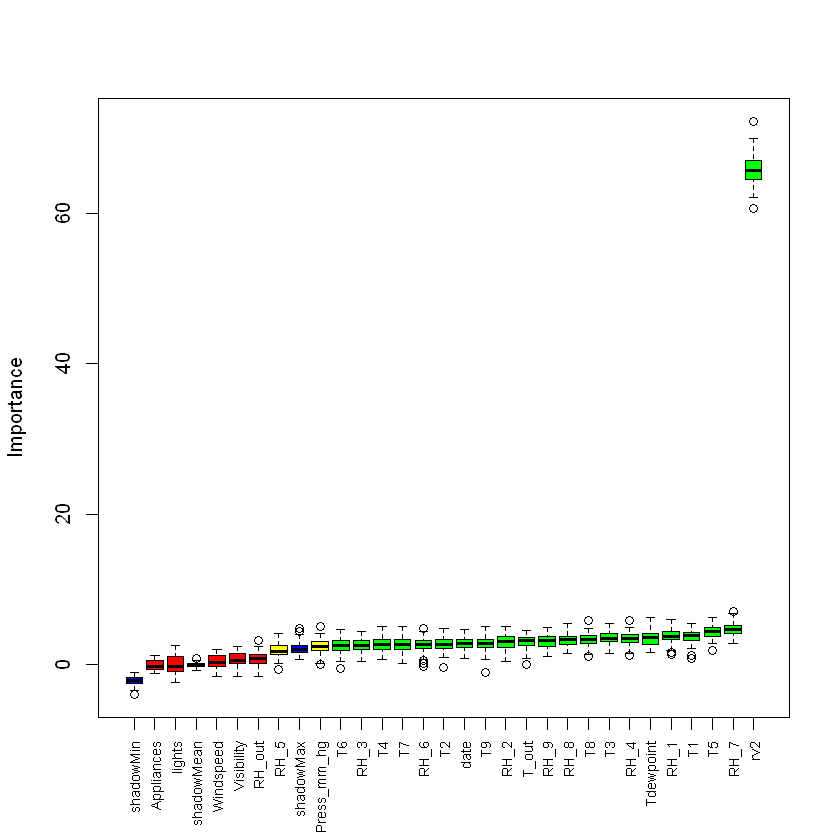

In [27]:
plot(boruta.df, xlab = "", xaxt = "n")
lz<-lapply(1:ncol(boruta.df$ImpHistory),function(i)
boruta.df$ImpHistory[is.finite(boruta.df$ImpHistory[,i]),i])
names(lz) <- colnames(boruta.df$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),
at = 1:ncol(boruta.df$ImpHistory), cex.axis = 0.7)

## Linear Regression

In [39]:
df <- select[df,-c('shadowMin','Appliances','shadowMean','Windspeed')]

ERROR: Error in -c("shadowMin", "Appliances", "shadowMean", "Windspeed"): invalid argument to unary operator


In [35]:
linearmodel <- lm(rv1~RH_7+T5+T1,data=df)

In [36]:
summary(linearmodel)


Call:
lm(formula = rv1 ~ RH_7 + T5 + T1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.1712 -12.4958  -0.1026  12.5825  25.1745 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.994485   1.530654  16.983   <2e-16 ***
RH_7         0.007706   0.020407   0.378    0.706    
T5          -0.002852   0.120527  -0.024    0.981    
T1          -0.056407   0.138154  -0.408    0.683    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.5 on 19731 degrees of freedom
Multiple R-squared:  4.57e-05,	Adjusted R-squared:  -0.0001063 
F-statistic: 0.3006 on 3 and 19731 DF,  p-value: 0.825


## Ridge Regression

In [16]:
library(glmnet)

In [19]:
y <- df$rv1
x <- data.matrix(df[, c('T5','RH_5')])
model <- glmnet(x, y, alpha = 0)

In [20]:
summary(model)

          Length Class     Mode   
a0         80    -none-    numeric
beta      160    dgCMatrix S4     
df         80    -none-    numeric
dim         2    -none-    numeric
lambda     80    -none-    numeric
dev.ratio  80    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        4    -none-    call   
nobs        1    -none-    numeric

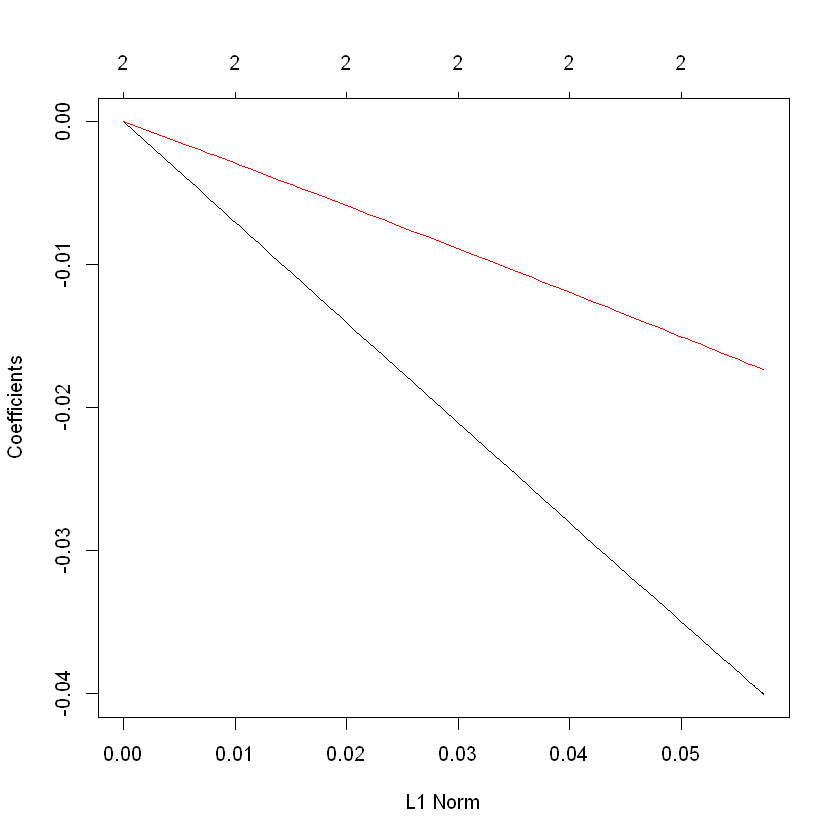

In [21]:
plot(model)

In [22]:
coef(model)

   [[ suppressing 80 column names 's0', 's1', 's2' ... ]]


3 x 80 sparse Matrix of class "dgCMatrix"
                                                                             
(Intercept)  2.498803e+01 25.145528764 25.159321064 25.174173751 25.190142079
T5          -4.358270e-38 -0.003873030 -0.004211333 -0.004575488 -0.004966813
RH_5        -1.794462e-38 -0.001601877 -0.001742492 -0.001893978 -0.002056913
                                                                            
(Intercept) 25.207279534 25.225636863 25.245260990 25.266193826 25.288470985
T5          -0.005386578 -0.005835979 -0.006316113 -0.006827948 -0.007372291
RH_5        -0.002231860 -0.002419352 -0.002619891 -0.002833925 -0.003061845
                                                                           
(Intercept) 25.312120430 25.337161085 25.363601432 25.391438161 25.42065490
T5          -0.007949756 -0.008560728 -0.009205335 -0.009883408 -0.01059446
RH_5        -0.003303962 -0.003560500 -0.003831576 -0.004117190 -0.00441721
                                  